In [31]:
import icepp
from collections import OrderedDict
import numpy as np
from sample.onestepSim_LBNL import runQuantum as step_1
from sample.twostepSim_LBNL import runQuantum as step_2
circuit_LBNL1 = step_1(gLR=1,dophisplit=1)
circuit_LBNL2 = step_2(gLR=1,dophisplit=1)
from qiskit import *

In [2]:
def gates(counts):
    gates = [0, 0, 0]

    for key in counts.keys():

        if key == 'cx':
            gates[0] += counts[key]
            gates[2] += counts[key]

        if key in ['sx','x']:
            gates[1] += counts[key]
            gates[2] += counts[key]

    print(gates)
    
def times(iteration, qc):
    time_sum = np.array([0]*5)
    for _ in range(iteration):
        time_sum = time_sum + np.array(pass_manager2.pass_manager(qc, measure_type='cc').aqcel_apply_time()) / iteration
    print(time_sum)

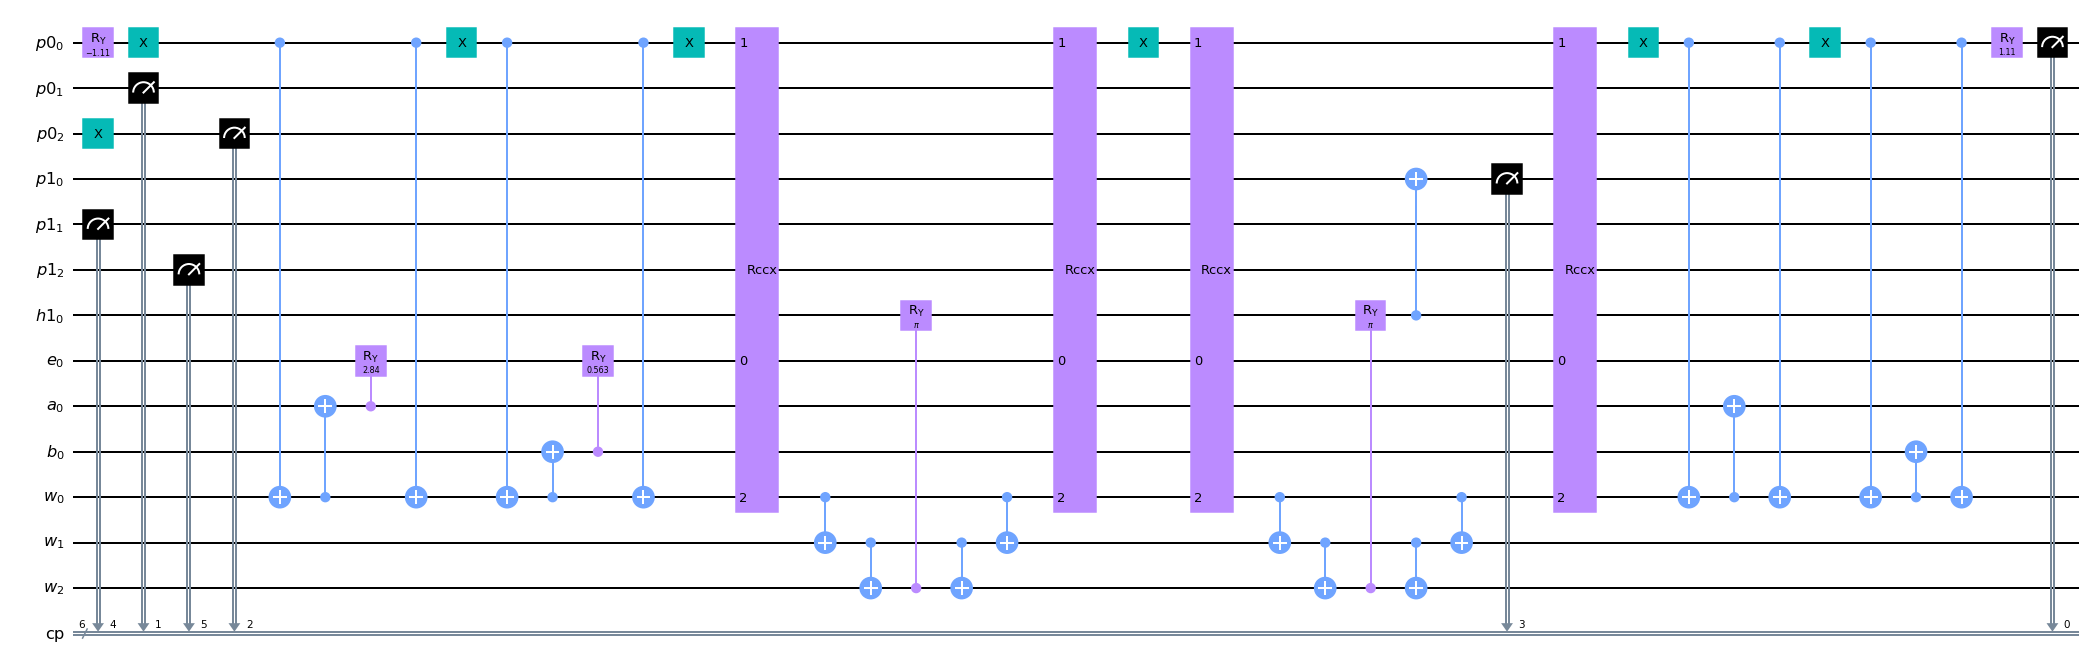

In [38]:
only_qc = icepp.pass_manager(circuit_LBNL1, measure_type='cc').aqcel_apply()
only_qc.draw('mpl',fold=100)

In [3]:
from icepp import pass_manager2

In [4]:
only_qc = pass_manager2.pass_manager(circuit_LBNL1, measure_type='cc').aqcel_apply_counts()

OrderedDict([('rz', 618), ('sx', 412), ('cx', 155), ('x', 19), ('measure', 6)])
OrderedDict([('rz', 294), ('sx', 124), ('cx', 99), ('x', 19), ('measure', 6)])
OrderedDict([('rz', 294), ('sx', 124), ('cx', 99), ('x', 9), ('measure', 6)])
OrderedDict([('rz', 70), ('cx', 41), ('sx', 36), ('x', 9), ('measure', 6)])
OrderedDict([('rz', 70), ('cx', 41), ('sx', 36), ('x', 7), ('measure', 6)])
OrderedDict([('rz', 70), ('cx', 41), ('sx', 36), ('x', 7), ('measure', 6)])


In [8]:
gates(OrderedDict([('rz', 618), ('sx', 412), ('cx', 155), ('x', 19), ('measure', 6)]))

[155, 431, 586]


In [9]:
gates(OrderedDict([('rz', 294), ('sx', 124), ('cx', 99), ('x', 19), ('measure', 6)]))

[99, 143, 242]


In [10]:
gates(OrderedDict([('rz', 294), ('sx', 124), ('cx', 99), ('x', 9), ('measure', 6)]))

[99, 133, 232]


In [11]:
gates(OrderedDict([('rz', 70), ('cx', 41), ('sx', 36), ('x', 9), ('measure', 6)]))

[41, 45, 86]


In [12]:
gates(OrderedDict([('rz', 70), ('cx', 41), ('sx', 36), ('x', 7), ('measure', 6)]))

[41, 43, 84]


In [13]:
time_sum = times(qc=circuit_LBNL1, iteration=30)

[0.00109741 0.154829   0.37368032 0.0472796  0.00044048]


In [17]:
sum([0.00109741, 0.154829,   0.37368032, 0.0472796,  0.00044048])

0.57732681

In [20]:
0.37368032/0.57732681

0.6472595998096815

In [21]:
(0.154829+ 0.0472796)/0.57732681

0.3500765883365091